# SIR Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Defining the model's equations:

$\dot{S(t)} = - \frac{\beta * I(t)}{N} * S(t)$

$\dot{I(t)} = \frac{\beta * I(t)}{N} * S(t) - \gamma * I(t)$

$\dot{R(t)} = \gamma * I(t)$

In [5]:
def dSIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Defining initial parameters for the model and simulation:
* **N**: Total population
* **tmax**: Simulated time (days)
* **iInit, rInit**: Initial infected and recovered populations
* **beta**: Contact rate
* **gamma**: Mean recovery rate

In [15]:
(N, tmax) = (1000, 1 * 365)
(iInit, rInit) = (1, 0)
(beta, gamma) = (0.2, 1./10)

Calculate internal variables

In [9]:
sInit = N - iInit - rInit
y0 = (sInit, iInit, rInit)
t = np.linspace(0, tmax, tmax)

Compute the model's response with the given parameters

In [ ]:
outModel = odeint(dSIR, y0, t, args=(N, beta, gamma))
(S, I, R) = outModel.T

Plot the output

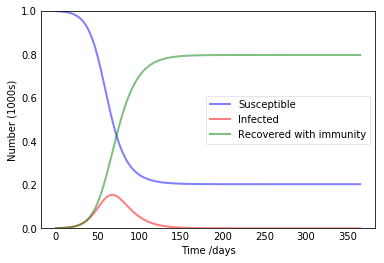

In [10]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

## Sources:
   * [The SIR epidemic model](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)